
# Spectral Clustering


## 1. Grafo de Similitud

Dados:

* Un conjunto de datos $X = \{x_1, x_2,...,x_n\}$ 

* Un valor de similitud $s_{ij} \geq 0$ entre dos datos $x_i$ y $x_j$. 

El objetivo es dividir el conjunto $X$ en diferentes grupos, de tal manera que los datos que se encuentran en un mismo grupo son aquellos que son similares entre sí, y diferentes a los que se encuentran en otros grupos. 

Una manera de representar los *data points* conociendo las *similitudes* entre ellos, es usando una *Matriz de Similitud G = (V,E)*, donde:

* Cada vértice $v_i$ representa a un dato $x_i$.

* Los vértices $v_i$ y $v_j$ están conectados si su similitud $s_{ij}$ es positiva o mayor a un *threshold*


### 1.1. Notación del Grafo
Dado $G = (V, E)$ un grado no-dirigido con el conjunto de vértices $V = \{v_1, v_2, ..., v_n\}$.  Asumimos que:

<img src="pictures/grafo.png",width=500,height=500>

* El grafo $G$ es ponderado, es decir, cada arista entre dos vértices $v_i$ y $v_j$  tiene un peso no-negativo $w_{ij} \geq 0 $.

* La **matriz de adyacencia ponderada**  del grafo es la matriz $W = (w_{ij})_{ij=1,...,n}$ .

* Si los vértices $v_i$ y $v_j$ no están conectados entonces $w_{ij} = 0$.

* La matriz de adyacencia es *simétrica* pues $w_{ij} = w_{ji}$. 

* El **grado** de un vértice $v_i$ se define como $$d_i = \sum_{j = 1}^{n}{w_{ij}}$$ 

* La **Matriz de Grado D** está definida como la matriz diagonal  con los grados $d_1, d_2,...,d_n$ en la diagonal. 

Sea el subconjunto $A \subset V$ de un **grafo es conexo** si para cualquier par de vértices en $A$ tiene una trayectoria con vértices intermediarios que pertenecen también a $A$.

El subconjunto $A$ es llamada **componente conexa** si además de conexo, no hay conexión entre los vértices de $A$ y su complemento $\bar{A}$.

Conociendo lo anterior, podemos definir los conjuntos no vacíos $A_1, A_2, ..., A_k$ son particiones del grafo $A$, tal que:

* $A_i \cap A_j = \emptyset$
* $A_1 \cup A_2 \cup ... \cup A_k = V$


### 1.2. Ejemplos Grafos de Similitud

Para transformar un conjunto de *data points* $x_1, x_2, ..., x_n$ en un grafo de similitudes $s_{ij}$ o de distancias $d_{ij}$, existen diversos métodos.

Construir *grafos de similitud* ayuda a modelar las relaciones de vecindad local entre los *data points*.

* **El Grafo $\varepsilon-$Neighborhood:**
Se conectan aquellos pares de vértices cuya distancia sea más pequeña que $\varepsilon$. Es así que los pesos del grafo estan en la misma escala.

* **El Grafo $k-$Nearest Neighbor**: Los véstices $v_i$ y $v_j$ están conectados si $v_j$ pertenece a los $k$ vecinos más cercanos de $v_i$. Esto define un grafo dirigido, pero ello puede ser solucionado de dos maneras:
    * Ignorar las direcciones de los arcos, es decir, existe la arista $e_{ij} \in E$ tal que $v_i$ es un $k$-vecino más cercano de $v_j$ o viceversa. De ello se obtiene el **grado de k-vecinos más cercanos**
    
    * Conectar los vértices $v_i$ y $v_j$ si uno pertenece a los $k-$vecinos más cercanos del otro y viceversa, obteniendo el **grafo de k-vecinos más cercanos mutuo**


* **El Grafo Completamente Conectado:** Se conectan aquellos vértices cuya similitud es positiva siendo ello su peso de la arista que los une $s_{ij}$. La función a usar debe reflejar las relaciones de vecindad local. 

    * Un ejemplo de esta función es la **función de similitud Gausiana** $s(x_i, x_j) = \exp{(-\frac{\|x_i - x_j \|^2}{2\sigma^2})}$
    * $\sigma$ controla el tamaño de la vecindad  similar a $\varepsilon$ del grafo  $\varepsilon-$neigborhood
    
    
<img src="pictures/matriz.png",width=400,height=400>

## 2. Grafos Laplacianos

Las principales herramientas para Spectral Clustering son las *matrices de grafos Laplacianos*.

Asumiendo que $G$ es un grado no dirigido y ponderado cuya matriz de adyacencia esta dada por $W$ donde $w_{ij} = w_{ji} \geq 0$.


### 2.1 Grafo Laplaciano No-normalizado
La matriz del Grafo Laplaciano no-normalizada se define:

$$L = D - A$$

Esta satisface las siguientes propiedades:

* Para cada vector $f$ en $\Re^n$ se tiene $$f L f' = \frac{1}{2} \sum_{i,j=1}^{n}{w_{ij}(f_i-f_j)^2}$$
* L es simétrica y semi-definida positiva.
* El eigenvalor más pequeño de $L$ es $0$.
* $L$ tiene n no-negativos y reales eugenvalores $0 = \lambda_1 \leq \lambda_2 \leq ... \leq \lambda_n$ 



#### Número de Componentes Conexas y Spectrum de L

Dado un grafo no dirigido $G$ con pesos no negativos.

* La multiplicidad de $k$ del eigenvalor $0$ de $L$, es igual al número de componentes conexas $A_1, A_2, ...,A_k$ del grafo. 


###### Ejemplo:
En el caso de $k = 1$, lo cual indica que el grafo es conexo. Entonces asumimos que $f$ es un eigenvalor con un eigenvalor igual a $0$.
$$ 0 = f L f' = \frac{1}{2} \sum_{i,j=1}^{n}{w_{ij}(f_i-f_j)^2}$$

* Dos vértices estan conectados si $w_{ij} >  0$.
* La ecuación anterior se cumple si $f_i - f_j = 0 $, es decir, ambos sean iguales. Por ende, el $f$ tiene que ser constante en todo el componente conexo. Entonces se tiene un sólo eigenvector con su eigenvalor igual a $0$.



Ahora consederemos que se tiene $k-componentes$ conexas, de forma mas general asumamos que los vértices estan ordenados y agrupados de acuerdo a sus componentes conexas. En este caso la matriz $W$ queda dividida como sigue:
 $$L = \begin{pmatrix}
L_1 & &  &  \\
 & L_2 &  &  \\
&  & \ddots & \\
&  &  & L_k \\
\end{pmatrix}$$

Cada bloque $L_i$ es de por si también un grafo Laplaciano, por lo cual es el Laplaciano correspondiente al $i-esimo$ componente conexo de $L$.

En conclusión el Spectrum de $L$ esta dado por la unión de los espectros $L_i$.

<img src="pictures/laplaciana.png",width=900,height=900>

### 2.2 Grafo Laplaciano Normalizado

La Matriz Laplaciana puede ser definida por:
$$L_{norm(i,j)} = 
\begin{cases}
1 & \text{, si $i = j$ y $d_i$ $\neq$ 0}\\
-\frac{1}{\sqrt{d_i *d_j}} & \text{, si  $i \neq j$ y $v_i$ es adyacente a $v_j$}\\
0 & \text{, otro caso.}
\end{cases}
$$

La matriz Laplaciana Normalizada $L_{norm}$ y la matriz Laplaciana $L$ están relacionadas como sigue:

$$L_{norm} := D^{-1/2}LD^{-1/2}$$

Esta matriz satisface las siguientes propiedades:

* Para cada vector $f$ en $\Re^n$ se tiene $$f L_{norm} f' = \frac{1}{2} \sum_{i,j=1}^{n}{w_{ij}(\frac{f_i}{\sqrt{d_i}} -\frac{f_j}{\sqrt{d_j}})^2}$$
* L es simétrica y semi-definida positiva.
* El eigenvalor más pequeño de $L$ es $0$.
* $L_{norm}$ tiene n no-negativos y reales eugenvalores $0 = \lambda_1 \leq \lambda_2 \leq ... \leq \lambda_n$ 

Tanto en la matriz $L$ como en la matriz $L_{norm}$, la multiplicidad $k$ del eigenvalor $0$ indican el número de componente conexas $A_i, A_2,...,A_k$ del grafo.


## 3. Algoritmos de Spectral Clustering

* Asumimos que nuestros datos son $n$ "puntos" $x_1, x_2,...,x_n$ los cuales pueden ser arbitrariamente objetos.
* Se cuenta con un valor de similitud entre cada par $s_{ij} = s(x_i, x_j)$ mediante una función de similitus que sea  simétrica y no negativa. Como resultado se obtiene la *Matriz de Similitud* $S=(s_{ij})_{i,j=1,...,n}$

### 3.1 Spectral Clustering No-Normalizado
Dado una matriz $S \in \Re^{nxn}$ y un número $k$ con clusters a construir:

* Construimos un *Grafo de Similitud* contenida en la matriz de adyacencia ponderada $W$,  mediante los métodos mencionados anteriormente.
* Cálculo de la matriz Laplaciana no normalizada $L$ de W.
* Cálculo de los primero $k$ eigenvectores $u_1, u_2,...,u_k$ de $L$.
* Dado $U \in \Re^{nxk}$, una matriz que contiene todos los eigenvectores como columnas.
* Sea $y_{i=1,...,n} \in \Re^k$, un vector pertenceciente a $U$. Agrupar los puntos $y_i$ con el algoritmo **k-means** dentro de $C_1,...,C_k$ grupos.
    
Obtenemos los grupos $A_1,...,A_k$ con $A_i = \{j | y_j \in C_i\}$

### 3.2 Spectral Clustering Normalizado

Dado una matriz $S \in \Re^{nxn}$ y un número $k$ con clusters a construir:

* Construimos un *Grafo de Similitud* contenida en la matriz de adyacencia ponderada $W$,  mediante los métodos mencionados anteriormente.
* Cálculo de la matriz Laplaciana  normalizada $L_{norm}$ de W.
* Cálculo de los primero $k$ eigenvectores $u_1, u_2,...,u_k$ de $L_{norm}$.
* Dado $U \in \Re^{nxk}$, una matriz que contiene todos los eigenvectores como columnas.
* Obtenemos la Matriz $T \in \Re^{nxk}$ basada en  la normalización de $U$.
$$t_{ij} = \frac{u_{ij}}{\sqrt{\sum_{k}{u_{ik}^2}}}$$
* Sea $y_{i=1,...,n} \in \Re^k$, un vector pertenceciente a $T$. Agrupar los puntos $y_i$ con el algoritmo **k-means** dentro de $C_1,...,C_k$ grupos.
    
Obtenemos los grupos $A_1,...,A_k$ con $A_i = \{j | y_j \in C_i\}$

# Pruebas

Para las pruebas se usará datos en 2D, donde mostraremos la eficiencia de agrupamiento de Spectral Clustering

In [1]:
import time
import numpy as np
import pylab as pl
from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

Generando datos de manera automática, defidiendo antes el número de puntos.

In [2]:
n_samples = 750
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

pl.figure(figsize=(14, 9.5))
pl.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1

## Graficando data

In [3]:
datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # Normalizando datos para una facil seleccion de parametros
    X = StandardScaler().fit_transform(X)
    # plot
    pl.subplot(2, 2, plot_num)
    pl.scatter(X[:, 0], X[:, 1], color='g', s=10)

    pl.xlim(-2.5, 2.5)
    pl.ylim(-2.5, 2.5)
    pl.xticks(())
    pl.yticks(())
    plot_num += 1

#pl.show()

Para una mejor visión del funcionamiento de Spectral Clustering se hará una comparación con el algoritmo K-means

/home/anoblega/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/anoblega/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


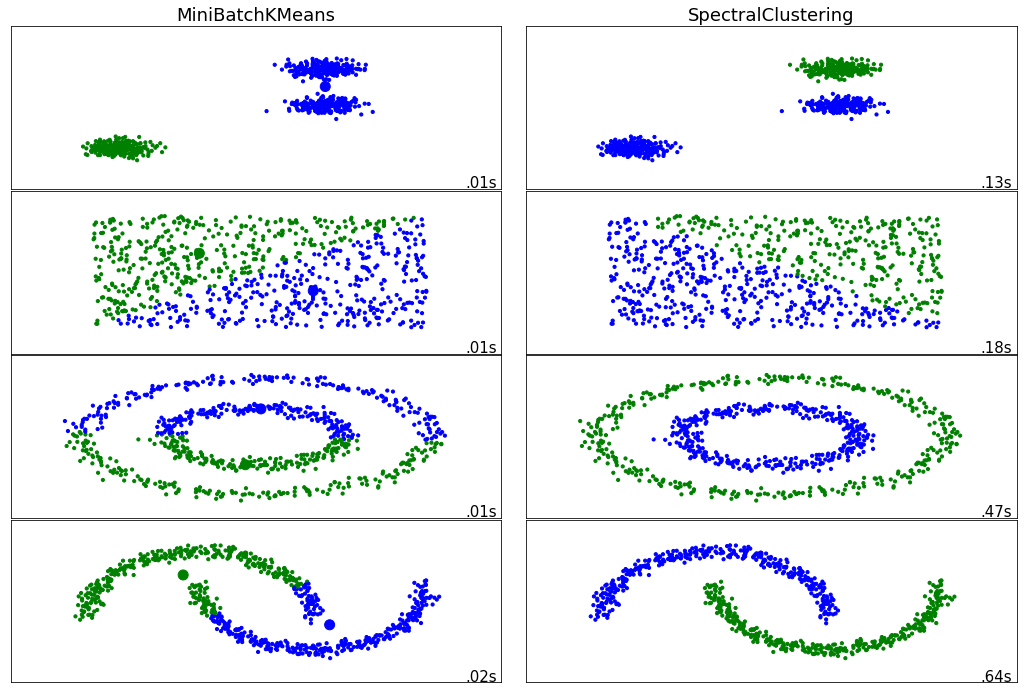

In [4]:
plot_num = 1
n_clusters=2

# Aplicamos los clusters para la comparacion
datasets = [blobs, no_structure,noisy_circles, noisy_moons]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset

    # Normalizar datos para un facil selecion de parametros
    X = StandardScaler().fit_transform(X)

    # Una forma de llegar a tu matris de similitud, generando una matriz de conectividad entre los puntos
    connectivity = kneighbors_graph(X, n_neighbors=10)
    # conectividad simetrica
    connectivity = 0.5 * (connectivity + connectivity.T)

    # calculando distancias
    distances = euclidean_distances(X)

    # instaciando Cluster (K-means y Spectral Clustering)
    two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
    spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          eigen_solver='arpack',
                                          affinity='nearest_neighbors',
                                          assign_labels='discretize')
    


    for algorithm in [two_means, spectral]:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        pl.subplot(4, 2, plot_num)
        if i_dataset == 0:
            pl.title(str(algorithm).split('(')[0], size=18)
        pl.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            pl.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        pl.xlim(-2.5, 2.5)
        pl.ylim(-2.5, 2.5)
        pl.xticks(())
        pl.yticks(())
        pl.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=pl.gca().transAxes, size=15,
                horizontalalignment='right')
        plot_num += 1

pl.show()

## Mostrando Eigen Vectores

In [5]:
import numpy as np
from sklearn.feature_extraction import image
from sklearn.manifold import SpectralEmbedding

Vamos a construir los círculos que serán usados, para usar la función espectral para ver la iteración de los Eigen vectores.

In [6]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2 = 16, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2

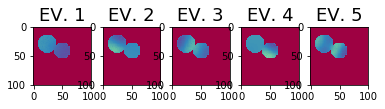

In [7]:
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.1 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

se = SpectralEmbedding(n_components=5,affinity='precomputed')

Y = se.fit_transform(graph.toarray())

for j in range(0,se.n_components):
    pl.subplot(1,se.n_components, j+1)
    label_im = -np.ones(mask.shape)
    label_im[mask] = Y[:,j]
    pl.title('EV. %i' % (j+1), size=18)
    pl.imshow(label_im,cmap=pl.cm.Spectral)
pl.show()
pl.figure()
pl.scatter(Y[:, 1], Y[:, 2], c=Y[:,0], cmap=pl.cm.Spectral)

# Aplicación de Spectral Clustering

In [8]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version
from PIL import Image, ImageOps

In [9]:

img2 = Image.open('lena.png')  # Se abre la imagen PNG
grises = ImageOps.grayscale(img2)

# Para agilizar el procesamiento de la imagen se reduce el tamaño al 50%
grises = sp.misc.imresize(grises, 0.50) / 255.

# Convertimos la imagen en un grafo con valores de la gradiente en las aristas.
graph = image.img_to_graph(grises)

# Definimos un parametro beta, mientras mas pequeño sea ese valor la segmentacion es mas independiente
beta = 7
eps = 1e-6

# Usamos la funcion decreciente de la gradiente (exponencial)
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Numero de regiones a segmentar
N_REGIONS = 25

Spectral clustering: kmeans, 175.24s
Spectral clustering: discretize, 194.49s


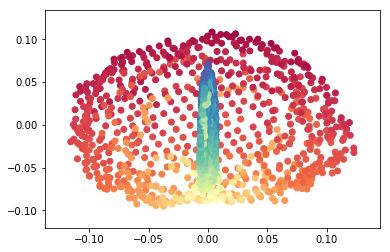

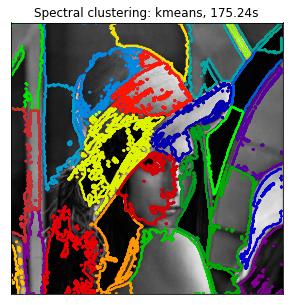

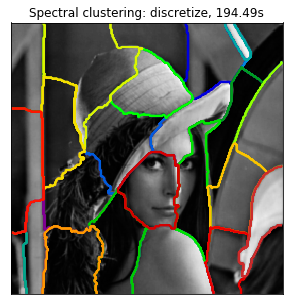

In [10]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(grises.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(grises, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()